In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df_original = pd.read_csv(r'C:\Users\Inigo\OneDrive - University of Bristol\Coding Stuff\Applied ML\AppliedML2024\FinalProject\predict-energy-behavior-of-prosumers\train_full.csv')
df = df_original.copy()

MemoryError: Unable to allocate 695. MiB for an array with shape (46, 1979482) and data type float64

In [ ]:
df = df_original.copy()
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

consumption = df[df['is_consumption'] == 1]
production = df[df['is_consumption'] == 0]

# plt.figure(figsize = (10, 5))
# plt.scatter(consumption.index, consumption['target'], s = 0.1 , alpha = 0.2, c = 'r', label = 'Consumption')
# plt.scatter(production.index, production['target'], s = 0.1 , alpha = 0.2, c = 'g', label = 'Production')
# plt.legend()
# plt.xlabel('Time')
# plt.ylabel('Energy')


Text(0, 0.5, 'Amount of Energy')

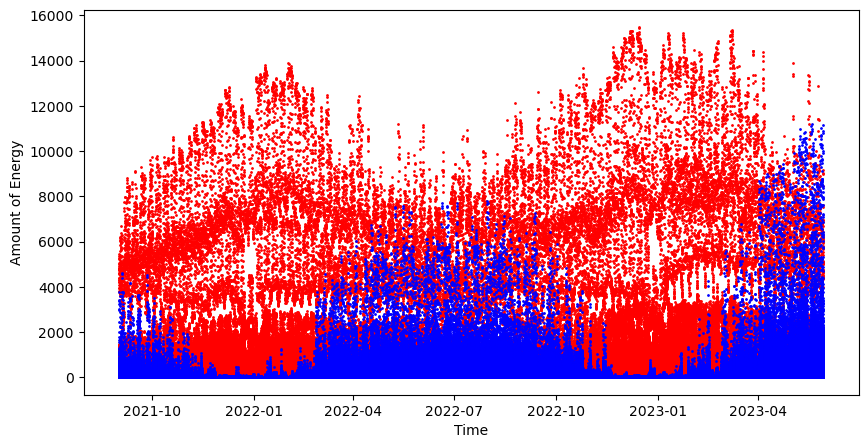

In [5]:
plt.figure(figsize = (10, 5))
plt.scatter(consumption.index, consumption['target'], s = 1 , alpha = 1, c = 'red', label = 'Consumption')
plt.scatter(production.index, production['target'], s = 1 , alpha = 1, c = 'blue', label = 'Production')
plt.xlabel('Time')
plt.ylabel('Amount of Energy')

In [24]:
from datetime import datetime

bus_consumption = consumption[consumption['is_business'] == 1]
x1 = np.linspace(0, len(bus_consumption['target']), len(bus_consumption['target']))

nbus_consumption = consumption[consumption['is_business'] == 0]
x2 = np.linspace(0, len(nbus_consumption['target']), len(nbus_consumption['target']))


# plt.scatter(x1, bus_consumption['target'], s = 0.1 , alpha = 0.4, c = 'r')
# plt.scatter(x2, nbus_consumption['target'], s = 0.1 , alpha = 0.4, c = 'b')



C:\Users\Inigo\AppData\Local\Temp\ipykernel_352\1987484959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_consumption['datetime'] = pd.to_datetime(bus_consumption['datetime'])


datetime64[ns]


KeyError: 0

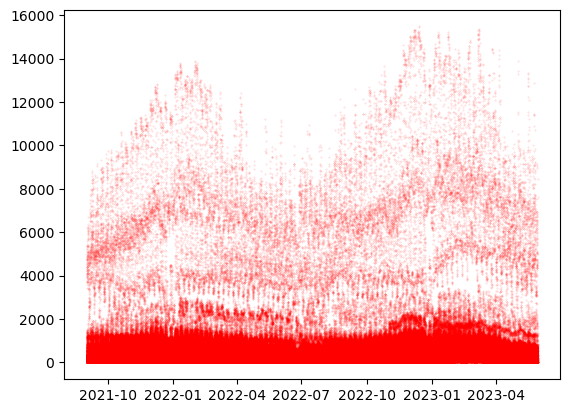

In [41]:
bus_consumption = consumption[consumption['is_business'] == 1]
bus_consumption['datetime'] = pd.to_datetime(bus_consumption['datetime'])
print(bus_consumption['datetime'].dtype)

bus_consumption.set_index('datetime', inplace=True)
# hourly_avg = bus_consumption.groupby(df.index.hour).mean()

plt.scatter(bus_consumption.index, bus_consumption['target'], alpha = 0.2, c = 'r', s = 0.1)

print(bus_consumption[0])

# Plot business and capacity

In [3]:
consumption = df[df['is_consumption'] == 1]
production = df[df['is_consumption'] == 0]

bus_consumption = consumption[consumption['is_business'] == 1]
nbus_consumption = consumption[consumption['is_business'] == 0]

# Creating the target arrays
bus_production = production[production['is_business'] == 1]
nbus_production = production[production['is_business'] == 0]

bus_cons_target = bus_consumption['target']
nbus_cons_target = nbus_consumption['target']

bus_production_target = bus_production['target']
nbus_production_target = nbus_production['target']

# Creating the installed_capacity arrays
bus_cons_cap = bus_consumption['installed_capacity']
nbus_cons_cap = nbus_consumption['installed_capacity']

bus_prod_cap = bus_production['installed_capacity']
nbus_prod_cap = nbus_production['installed_capacity']

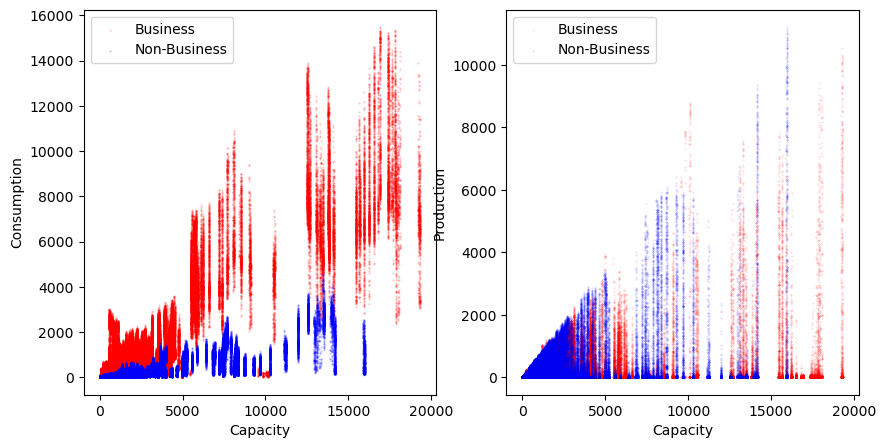

In [8]:
# Creating 2 subplots side by side

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.scatter(bus_cons_cap, bus_cons_target, alpha = 0.2, c = 'r', s = 0.3, label = 'Business')
plt.scatter(nbus_cons_cap, nbus_cons_target, alpha = 0.2, c = 'b', s = 0.3, label = 'Non-Business')
plt.xlabel('Capacity')
plt.ylabel('Consumption')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(bus_prod_cap, bus_production_target, alpha = 0.2, c = 'r', s = 0.1, label = 'Business')
plt.scatter(nbus_prod_cap, nbus_production_target, alpha = 0.2, c = 'b', s = 0.1, label = 'Non-Business')
plt.xlabel('Capacity')
plt.ylabel('Production')
plt.legend()

plt.show()

In [42]:
# Find r correlation on capacity and target

bus_cons_corr = np.corrcoef(bus_cons_cap, bus_cons_target)
print(bus_cons_corr)

nbus_cons_corr = np.corrcoef(nbus_cons_cap, nbus_cons_target)
print(nbus_cons_corr)


[[1.         0.91124695]
 [0.91124695 1.        ]]
[[1.         0.82889093]
 [0.82889093 1.        ]]


TypeError: agg function failed [how->mean,dtype->object]

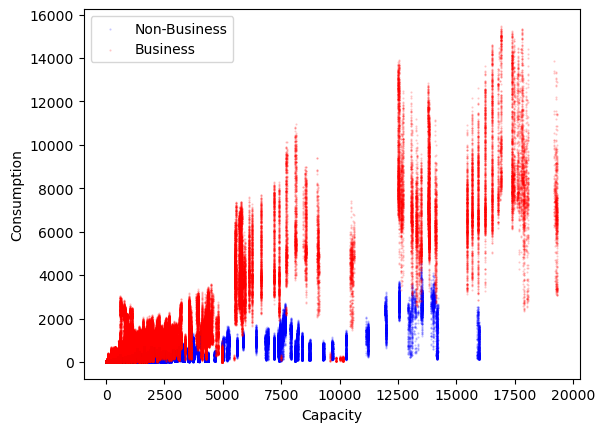

In [15]:
plt.scatter(nbus_cons_cap, nbus_cons_target, alpha = 0.2, c = 'b', s = 0.3, label = 'Non-Business')
plt.scatter(bus_cons_cap, bus_cons_target, alpha = 0.2, c = 'r', s = 0.3, label = 'Business')
plt.xlabel('Capacity')
plt.ylabel('Consumption')
plt.legend()

In [5]:
# Now find the average consumption for each capacity

bus_cons_mean_target = bus_consumption.groupby('installed_capacity')['target'].mean()
nbus_cons_mean_target = nbus_consumption.groupby('installed_capacity')['target'].mean()

0.9454780289845626
0.8739013087923131


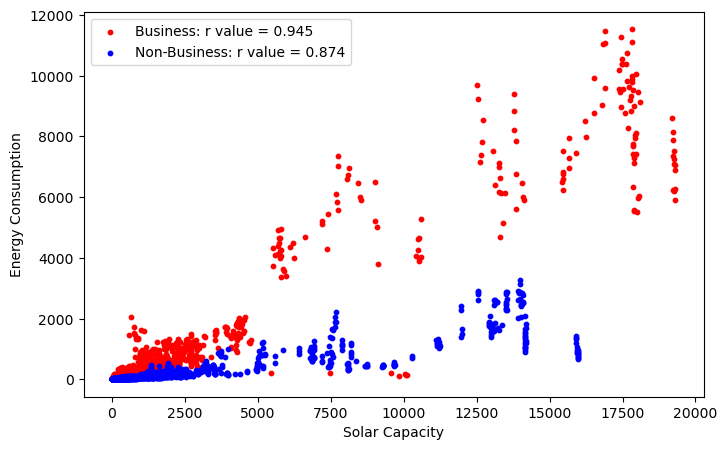

In [6]:
bus_cons_corr = np.corrcoef(bus_cons_mean_target.index, bus_cons_mean_target)
print(bus_cons_corr[0][1])

nbus_cons_corr = np.corrcoef(nbus_cons_mean_target.index, nbus_cons_mean_target)
print(nbus_cons_corr[0][1])

plt.figure(figsize = (8, 5))
plt.scatter(bus_cons_mean_target.index, bus_cons_mean_target, c = 'r', s = 10, label = f'Business: r value = {round(bus_cons_corr[0][1],3)}')
plt.scatter(nbus_cons_mean_target.index, nbus_cons_mean_target, c = 'b', s = 10, label = f'Non-Business: r value = {round(nbus_cons_corr[0][1],3)}')
plt.xlabel('Solar Capacity')
plt.ylabel('Energy Consumption')
plt.legend()

In [47]:
bus_cons_corr = np.corrcoef(bus_cons_mean_target.index, bus_cons_mean_target)
print(bus_cons_corr[0][1])

nbus_cons_corr = np.corrcoef(nbus_cons_mean_target.index, nbus_cons_mean_target)
print(nbus_cons_corr[0][1])


0.9454780289845626
0.8739013087923131


# Plot of all variable

In [ ]:
# sns.pairplot(consuwhatsmption)
plt.show()